# **Redes Neuronales Artificiales**

Una red neuronal (también conocida como neurona artificial o perceptrón multicapa) es un modelo computacional inspirado en la estructura y funcionamiento del cerebro humano. Consiste en un conjunto de unidades interconectadas llamadas "neuronas" o "nodos", organizadas en capas. Cada neurona recibe entradas, realiza cálculos y produce una salida.

Hay varios tipos de redes neuronales, cada una diseñada para resolver diferentes tipos de problemas y con arquitecturas específicas. Los principales tipos de redes neuronales incluyen:

- **Redes Neuronales Feedforward (Perceptrón Multicapa):** son la forma más común de redes neuronales:
  + La información fluye en una sola dirección, desde las entradas hasta las salidas sin retroalimentación.
  + Consisten en una capa de entrada, una o más capas ocultas y una capa de salida.
  + Cada neurona en una capa está conectada a todas las neuronas en la capa siguiente.

- **Redes Neuronales Convolucionales (CNN):**
  + Las CNN son especialmente efectivas en tareas de visión por computadora.
  + Utilizan capas de convolución para detectar patrones locales en una imagen.
  + Son capaces de aprender características como bordes, texturas y formas.

- **Redes Neuronales Recurrentes (RNN):**
  * Las RNN son adecuadas para trabajar con datos secuenciales, como texto o series temporales.
  + Tienen conexiones retroalimentadas, lo que significa que la salida de una neurona puede volver como entrada en una iteración posterior.
  + Son capaces de modelar relaciones temporales y dependencias a largo plazo.

- **Redes Neuronales de Memoria a Corto Plazo (LSTM) y Redes Neuronales de Memoria de Corto Plazo Bidireccionales (BiLSTM):**
  + Variantes de las RNN diseñadas para capturar dependencias a largo plazo en secuencias.
  + Las LSTM están diseñadas para evitar el problema de desvanecimiento del gradiente.

- **Redes Neuronales Generativas (GAN):** Consisten en dos redes neuronales, un generador y un discriminador, que compiten en un juego adversarial para generar datos que sean indistinguibles de los datos reales.

- **Redes Neuronales Autoencoders:**
  + Son redes utilizadas para aprender representaciones comprimidas (o códigos) de los datos de entrada.
  + Consisten en una etapa de codificación y una etapa de decodificación.

- **Redes Neuronales Siamesas:**
  + Se utilizan para comparar o clasificar pares de datos.
  + Comparten los mismos pesos en ambas ramas y luego se utilizan para calcular una métrica de similitud.

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

El módulo **from tensorflow.keras import layers** es utilizado para construir y configurar las capas de una red neuronal en TensorFlow;  tales como capas de entrada, capas ocultas y capas de salida de tu red neuronal.

In [22]:
from tensorflow.keras import layers

In [33]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

La **base de datos MNIST** es una extensa colección de base de datos que se utiliza ampliamente para el entrenamiento de diversos sistemas de procesamiento de imágenes.

In [23]:
# Cargamos el conjunto de datos MNIST (dígitos escritos a mano)
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

**Formato de codificación one-hot:** esta transformación es común en problemas de clasificación multiclase, donde se tiene un conjunto de etiquetas discretas y se desea representarlas de una manera que sea adecuada para la entrada a una red neuronal.

Por ejemplo, antes de la conversión, una etiqueta podría ser 3. Después de la conversión, se representaría como [0, 0, 0, 1, 0, 0, 0, 0, 0, 0], donde la posición 3 tiene un valor de 1 y todas las demás posiciones son 0.

In [24]:
# Preprocesamos los datos: escalamos las imágenes y convertimos las etiquetas en one-hot
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

**Modelo de Red Neuronal**

- **model = keras.Sequential([]):** Esta línea genera un modelo secuencial es una pila lineal de capas de red neuronal donde los datos fluyen en una dirección, de entrada a salida. En este modelo, las capas se agregan una tras otra en secuencia.

- **layers.Flatten(input_shape=(28, 28)):**
  + Esta línea agrega la primera capa al modelo. La capa Flatten se utiliza como capa de entrada y sirve para aplanar las imágenes de entrada.
  + La capa Flatten transforma esta matriz 2D (28x28) en un vector 1D (de longitud 28 * 28 = 784) para que la red neuronal pueda procesarla.

- **layers.Dense(128, activation='relu'):**
  + Esta línea agrega una capa oculta al modelo. En este caso, hay 128 neuronas en esta capa oculta.
  + La función de activación utilizada en estas neuronas es ReLU (Rectified Linear Activation), que es una función no lineal que ayuda a introducir no linealidades en el modelo.

- **layers.Dense(10, activation='softmax'):**
  + Esta línea agrega la capa de salida al modelo. La capa Dense de salida tiene 10 neuronas, una para cada clase posible en MNIST (dígitos del 0 al 9).
  + La función de activación utilizada aquí es softmax, que se usa comúnmente en problemas de clasificación multiclase. La función softmax calcula las probabilidades de pertenencia a cada clase y garantiza que la suma de estas probabilidades sea igual a 1, lo que permite que el modelo realice una clasificación de tipo "one-hot" (una sola clase es la predicción final).

In [25]:
# Construimos el modelo de red neuronal
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Capa de entrada: aplana la imagen
    layers.Dense(128, activation='relu'),  # Capa oculta con activación ReLU
    layers.Dense(10, activation='softmax')  # Capa de salida con activación softmax para clasificación multiclase
])

Las funciones de activación más comunes:

- **ReLU (Rectified Linear Unit):**
  + activation='relu': Es la función de activación por defecto en muchas capas ocultas de redes neuronales.
  + f(x) = max(0, x): Devuelve 0 si la entrada es negativa y la entrada misma si es positiva.

- **Sigmoid:**
  + activation='sigmoid': Utilizada en la capa de salida de una red neuronal para problemas de clasificación binaria.
  + f(x) = 1 / (1 + exp(-x)): Mapea los valores a un rango entre 0 y 1.

- **Tanh (Tangente hiperbólica):**
  + activation='tanh': Similar a la función sigmoid, pero mapea los valores a un rango entre -1 y 1.
  + f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)).

- **Softmax:**
  + activation='softmax': Usada en la capa de salida de redes neuronales para problemas de clasificación multiclase.
  + Calcula probabilidades para cada clase y asegura que la suma de las probabilidades sea igual a 1.
  + Útil para tareas de clasificación en las que se debe predecir una única clase de varias posibles.

In [26]:
# Compilamos el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Entrenamiento del Modelo:**

- **epochs=5:** El entrenamiento de una red neuronal se realiza en épocas. Una época significa que el modelo ha visto todos los ejemplos de entrenamiento una vez. En este caso, el modelo se entrenará durante 5 épocas completas.

- **batch_size=64:** El conjunto de entrenamiento se divide en lotes (batches) de tamaño 64. En cada época, el modelo verá 64 ejemplos a la vez antes de actualizar sus pesos. El uso de lotes es una técnica común para acelerar el entrenamiento y controlar el uso de memoria.

- **validation_split=0.2:** Esto indica que el 20% de los datos de entrenamiento se utilizarán como conjunto de validación. El conjunto de validación se usa para evaluar el rendimiento del modelo en datos que no se utilizan para el entrenamiento. Esto ayuda a detectar si el modelo está sobreajustando (overfitting) los datos de entrenamiento.



In [27]:
# Entrenamos el modelo
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 3s 4ms/step - loss: 0.3265 - accuracy: 0.9083 - val_loss: 0.1752 - val_accuracy: 0.9507
Epoch 2/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1517 - accuracy: 0.9556 - val_loss: 0.1339 - val_accuracy: 0.9611
Epoch 3/5
750/750 [==============================] - 2s 3ms/step - loss: 0.1070 - accuracy: 0.9690 - val_loss: 0.1071 - val_accuracy: 0.9689
Epoch 4/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0830 - accuracy: 0.9761 - val_loss: 0.1111 - val_accuracy: 0.9672
Epoch 5/5
750/750 [==============================] - 2s 3ms/step - loss: 0.0664 - accuracy: 0.9805 - val_loss: 0.1096 - val_accuracy: 0.9683


In [28]:
# Evaluamos el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Precisión en el conjunto de prueba: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0990 - accuracy: 0.9681
Precisión en el conjunto de prueba: 96.81%


**Predicción V01**

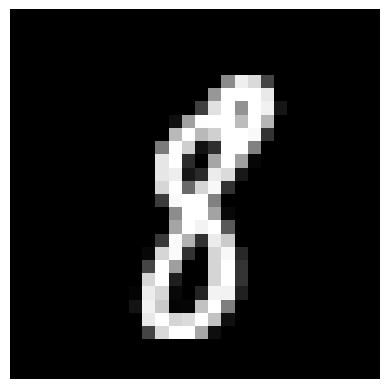

In [31]:
# Tomamos una imagen de entrenamiento para la predicción
sample_index = 300
nueva_imagen_preprocesada = train_images[sample_index]

plt.imshow(train_images[sample_index], cmap='gray')
plt.axis('off')
plt.show()

In [32]:
# Realizar la predicción
prediccion = model.predict(np.expand_dims(nueva_imagen_preprocesada, axis=0))

# Decodificar la predicción one-hot para obtener el dígito
etiqueta_predicha = np.argmax(prediccion)

print(f'Predicción para la nueva imagen: Dígito {etiqueta_predicha}')

1/1 [==============================] - 0s 42ms/step
Predicción para la nueva imagen: Dígito 8


**Prediccón V02**

In [40]:
# Cargamos una nueva imagen para la predicción
ruta_imagen = 'ImagenPrueba05.jpg'
imagen = load_img(ruta_imagen, target_size=(28, 28), color_mode = "grayscale")

In [41]:
# Preprocesamos la imagen
imagen = img_to_array(imagen)
imagen = imagen.reshape(28, 28)
imagen = imagen / 255.0
imagen = np.expand_dims(imagen, axis=0)

In [42]:
# Realizamos la predicción
prediccion = model.predict(imagen)

# Decodificamos la predicción one-hot para obtener el dígito
etiqueta_predicha = np.argmax(prediccion)

print(f'Predicción para la nueva imagen: Dígito {etiqueta_predicha}')

1/1 [==============================] - 0s 16ms/step
Predicción para la nueva imagen: Dígito 5
